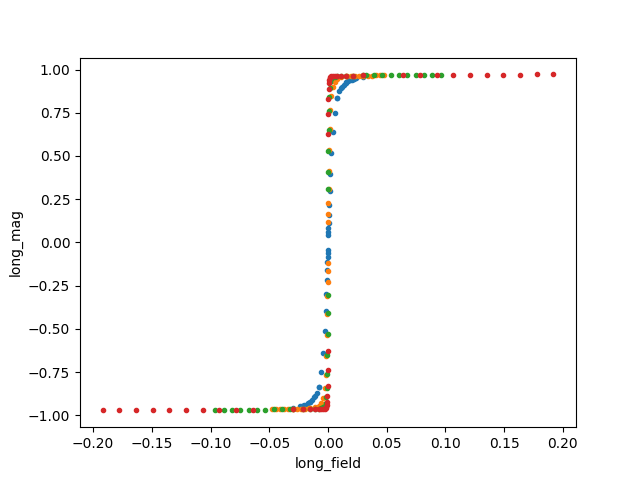

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget



data=pd.read_csv("long_mag.dat", sep=",")

fig, ax= plt.subplots()

for L in range(4,8):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(filtered_data2['h'], filtered_data2['long_mag'],marker="." , ls="")
plt.xlabel("long_field")
plt.ylabel("long_mag")
plt.show()

In [16]:
data

,L,g,h,long_mag
0,3,0.0,-0.030000,-1.000000
1,3,0.0,-0.021481,-1.000000
2,3,0.0,-0.015381,-1.000000
3,3,0.0,-0.011013,-1.000000
4,3,0.0,-0.007886,-1.000000
...,...,...,...,...
9919,11,1.0,0.000130,0.011257
9920,11,1.0,0.000145,0.012542
9921,11,1.0,0.000160,0.013827
9922,11,1.0,0.000175,0.015111


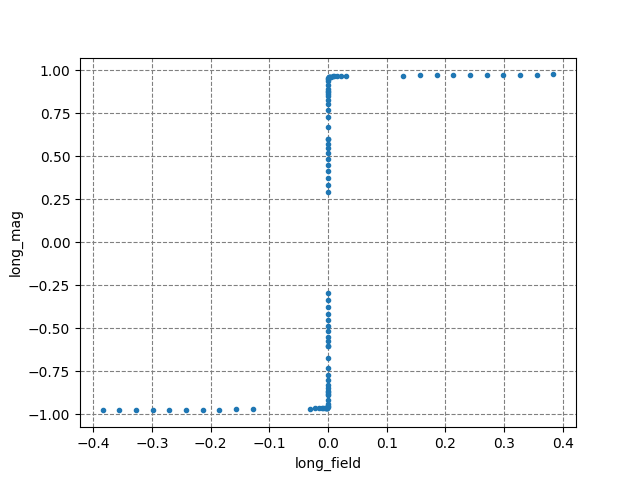

In [17]:
data=pd.read_csv("long_mag.dat", sep=",")

fig, ax= plt.subplots()

for L in range(8,9):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(filtered_data2['h'], filtered_data2['long_mag'],marker="." , ls="")
plt.grid(ls="--", color="gray")
plt.xlabel("long_field")
plt.ylabel("long_mag")
plt.show()

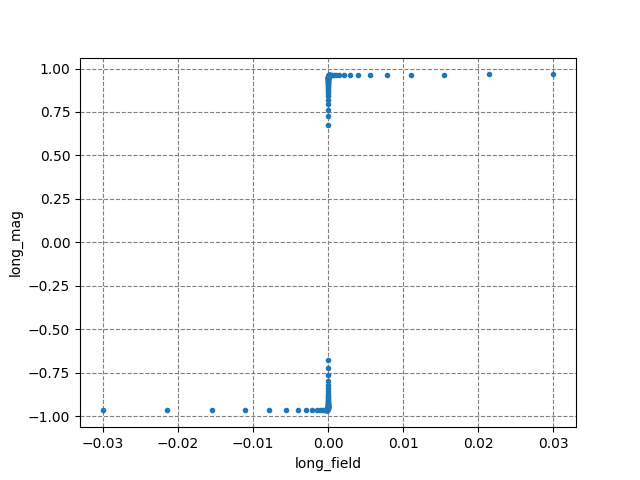

In [18]:
data=pd.read_csv("long_mag.dat", sep=",")

figa, axa= plt.subplots()
N=11
for L in range(N,N+1):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(filtered_data2['h'], filtered_data2['long_mag'],marker="." , ls="")
    plt.grid(ls="--", color="gray")
plt.xlabel("long_field")
plt.ylabel("long_mag")
plt.show()

In [19]:
import scipy
import numdifftools as nd


In [20]:
filtered_data_ordered=filtered_data2.sort_values(by="h")

In [21]:
hs=filtered_data_ordered["h"].to_numpy()
long_mags=filtered_data_ordered["long_mag"].to_numpy()

In [22]:
def stupid_derivative(xs: np.ndarray,ys: np.ndarray)->np.ndarray:
    return (ys[:-1]-ys[1:])/(xs[:-1]-xs[1:])
def stupid_coarsing(xs: np.ndarray)->np.ndarray:
    return (xs[1:]+xs[:-1])/2

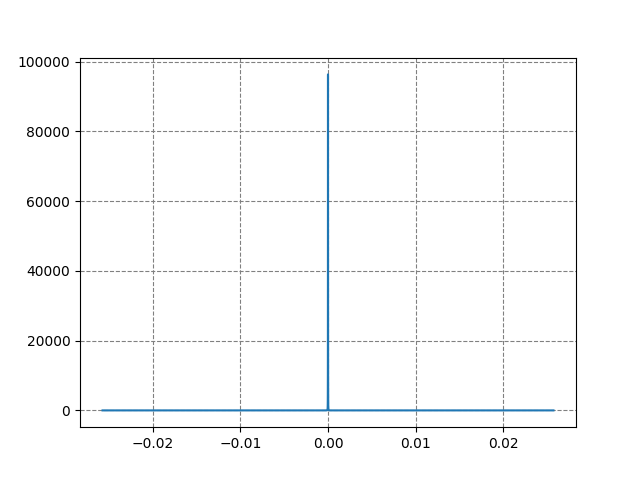

In [23]:
long_mags1=stupid_derivative(hs,long_mags)
hs1=stupid_coarsing(hs)

figb,axb=plt.subplots()
plt.plot(hs1,long_mags1)
plt.grid(ls="--", color="gray")
plt.show()

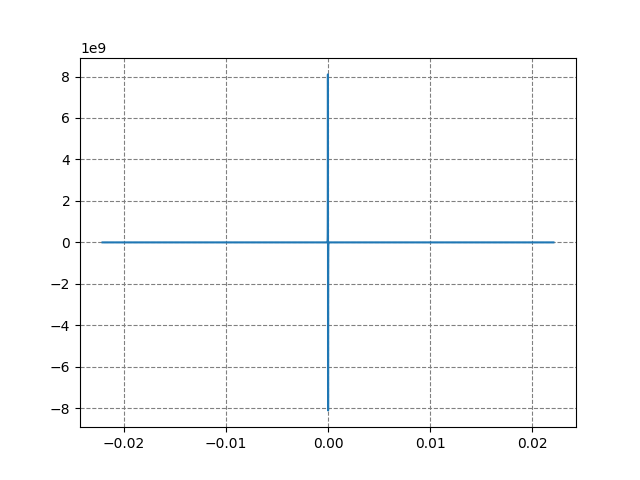

In [24]:
long_mags2=stupid_derivative(hs1,long_mags1)
hs2=stupid_coarsing(hs1)
fig2, ax2=plt.subplots()
plt.plot(hs2,long_mags2)
plt.grid(ls="--", color="gray")
plt.show()

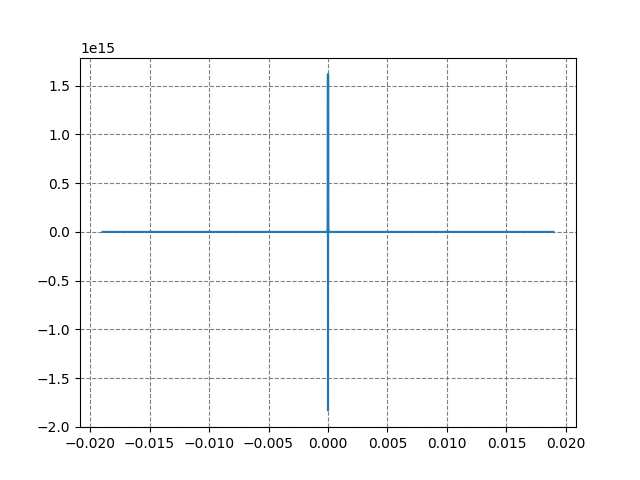

In [25]:
long_mags3=stupid_derivative(hs2,long_mags2)
hs3=stupid_coarsing(hs2)
fig3, ax3=plt.subplots()
plt.plot(hs3,long_mags3)
plt.grid(ls="--", color="gray")
plt.show()

In [26]:
def zero_crossings(xs, ys):
    zero_crossings=[]
    for i in range(1, len(xs)):
        if xs[i-1]*xs[i]<=0:
            new_zero_crossing = xs[i - 1] + (xs[i] - xs[i - 1]) * (0 - ys[i - 1]) / (ys[i] - ys[i - 1])
            zero_crossings.append(new_zero_crossing)
    return np.array(zero_crossings)

In [27]:
hcrits=zero_crossings(hs3,long_mags3)

In [28]:
hcrits

array([-6.98948188e-06,  6.98948219e-06])